# Python

### Python deps and reading data

In [91]:
import pandas as pd
import numpy as np
df = pd.read_csv("recent-grads.csv") # side note: entering direct raw github url resulted in some parser error.
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


### What categories of majors make more money than others?

### What are the highest earning majors?

# R

### R deps and reading data

In [92]:
library(tidyverse)
library(scales)
recent_grads <- read_csv("recent-grads.csv")

Parsed with column specification:
cols(
  .default = col_integer(),
  Major = col_character(),
  Major_category = col_character(),
  ShareWomen = col_double(),
  Unemployment_rate = col_double()
)
See spec(...) for full column specifications.


In [93]:
# options(repr.plot.width=NULL, repr.plot.height=NULL)
options(repr.plot.width=10, repr.plot.height=5)
theme_set(theme_light())

In [94]:
head(recent_grads)

Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,⋯,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.1205643,36,1976,⋯,270,1207,37,0.01838053,110000,95000,125000,1534,364,193
2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.1018519,7,640,⋯,170,388,85,0.11724138,75000,55000,90000,350,257,50
3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.1530374,3,648,⋯,133,340,16,0.02409639,73000,50000,105000,456,176,0
4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.1073132,16,758,⋯,150,692,40,0.05012531,70000,43000,80000,529,102,0
5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.3416305,289,25694,⋯,5180,16697,1672,0.06109771,65000,50000,75000,18314,4440,972
6,2418,NUCLEAR ENGINEERING,2573,2200,373,Engineering,0.1449670,17,1857,⋯,264,1449,400,0.17722641,65000,50000,102000,1142,657,244


In [95]:
# cleaning step
major_processed <- recent_grads %>%
    arrange(desc(Median)) %>%
    mutate(Major = str_to_title(Major), # change all caps to 
        Major = fct_reorder(Major, Median))

### What categories of majors make more money than others?

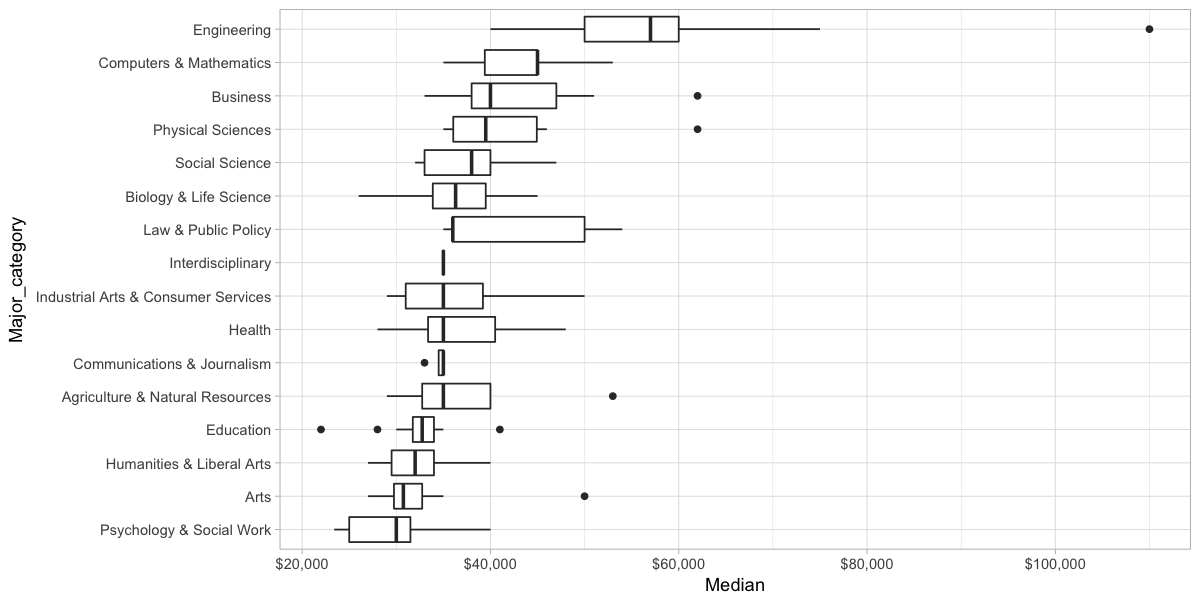

In [96]:
# visualize the distribution of salary for each major using boxplot
major_processed %>%
    # reorder Major_category according to the Median (top -> highest salary)
    mutate(Major_category = fct_reorder(Major_category, Median)) %>%
    # Major_category as X, Median as y
    ggplot(aes(Major_category, Median)) +
    geom_boxplot() +
    # reformats the Median (y) as currency in $
    scale_y_continuous(labels = dollar_format()) +
    # since it's hard to read the labels for x axis, flip coords
    coord_flip()

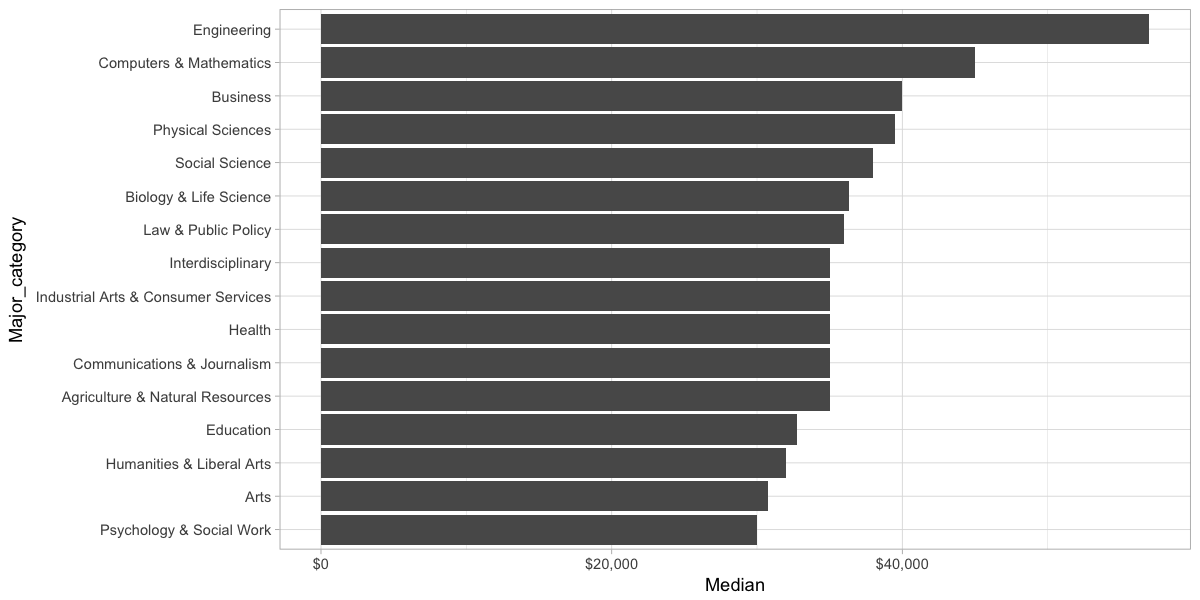

In [97]:
# visualize the distribution of salary for each major using bar
major_processed %>%
    group_by(Major_category) %>%
    summarize(Median = median(Median)) %>%
    mutate(Major_category = fct_reorder(Major_category, Median)) %>%
    ggplot(aes(Major_category, Median)) +
    geom_col() +
    scale_y_continuous(labels = dollar_format()) +
    coord_flip()

### What are the highest earning majors?

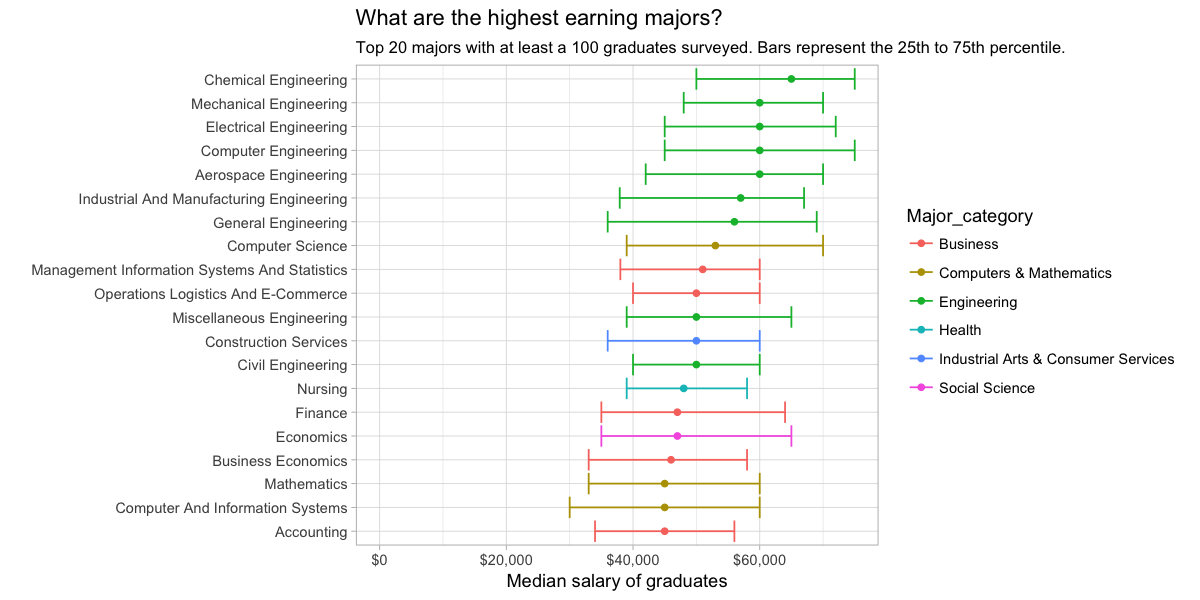

In [98]:
major_processed %>%
    filter(Sample_size >= 100) %>%
    head(20) %>%
    ggplot(aes(Major, Median, color=Major_category)) +
    geom_point() + 
    # show intervals (range of salaries)
    geom_errorbar(aes(ymin = P25th, ymax = P75th)) +
    # geom_point doesn't start at 0 whereas geom_col does
    # so need to expand scale to start from 0
    expand_limits(y = 0) + 
    scale_y_continuous(labels = dollar_format()) +
    coord_flip() +
    labs(title = "What are the highest earning majors?", 
        subtitle = "Top 20 majors with at least a 100 graduates surveyed. Bars represent the 25th to 75th percentile.",
        x = "",
        y = "Median salary of graduates")

### What are the lowest earning majors?

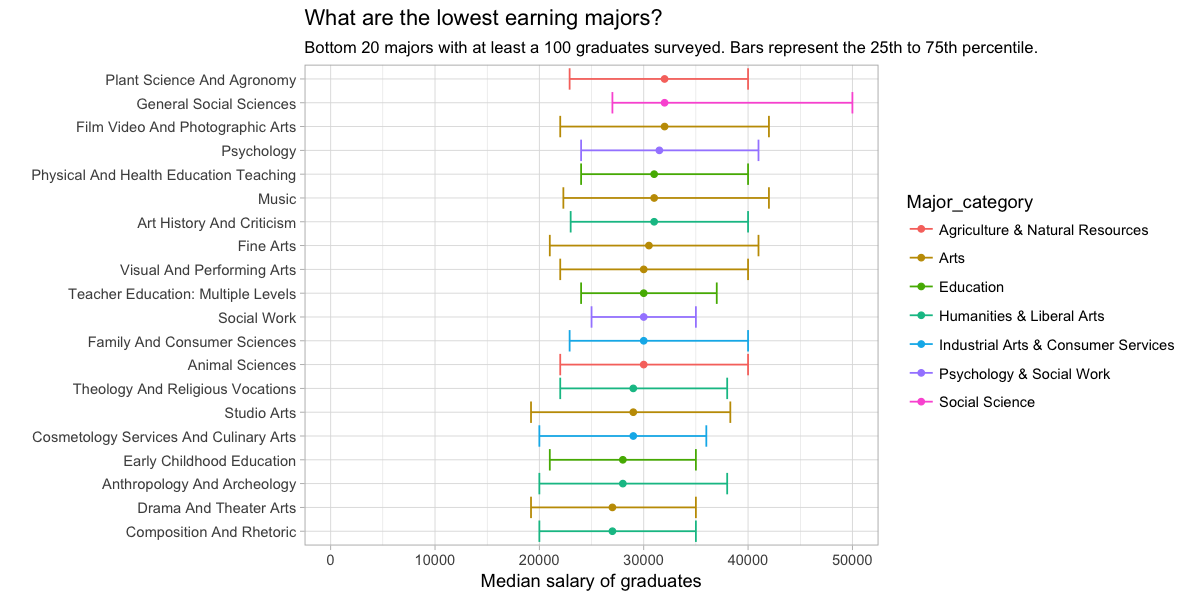

In [99]:
major_processed %>%
    filter(Sample_size >= 100) %>%
    tail(20) %>%
    ggplot(aes(Major, Median, color=Major_category)) +
    geom_point() + 
    # show intervals (range of salaries)
    geom_errorbar(aes(ymin = P25th, ymax = P75th)) +
    # geom_point doesn't start at 0 whereas geom_col does
    # so need to expand scale to start from 0
    expand_limits(y = 0) + 
    coord_flip() +
    labs(title = "What are the lowest earning majors?", 
        subtitle = "Bottom 20 majors with at least a 100 graduates surveyed. Bars represent the 25th to 75th percentile.",
        x = "",
        y = "Median salary of graduates")

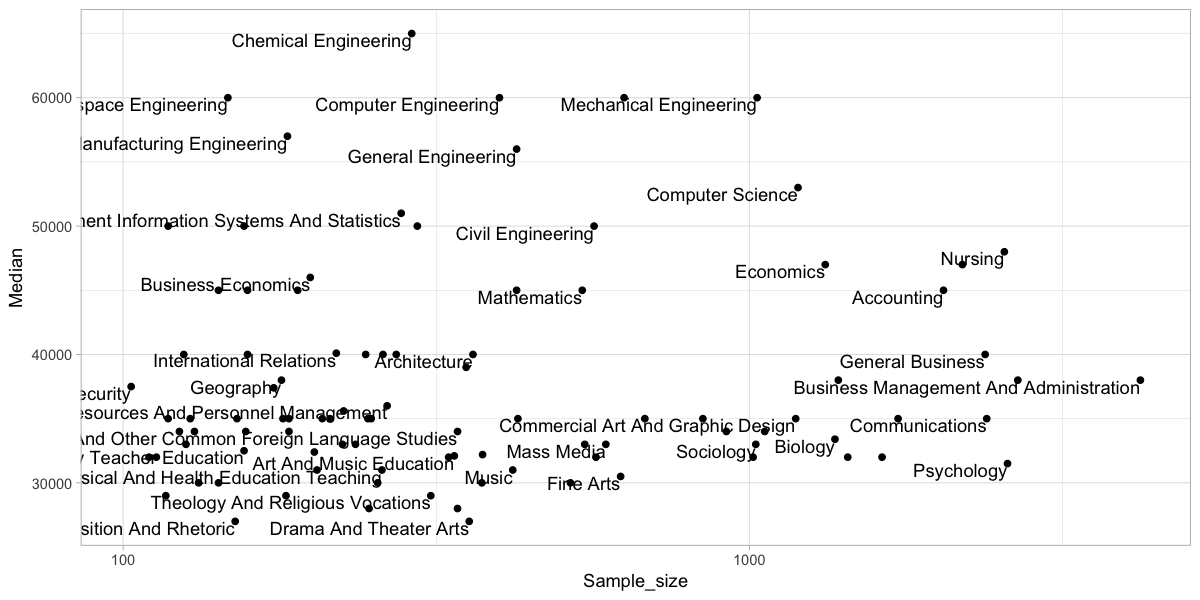

In [100]:
major_processed %>%
    filter(Sample_size >= 100) %>%
    ggplot(aes(Sample_size, Median)) +
    geom_point() +
    geom_text(aes(label = Major), check_overlap = TRUE, vjust = 1, hjust = 1) +
    scale_x_log10()

### Most common major categories

What major categories were most common?

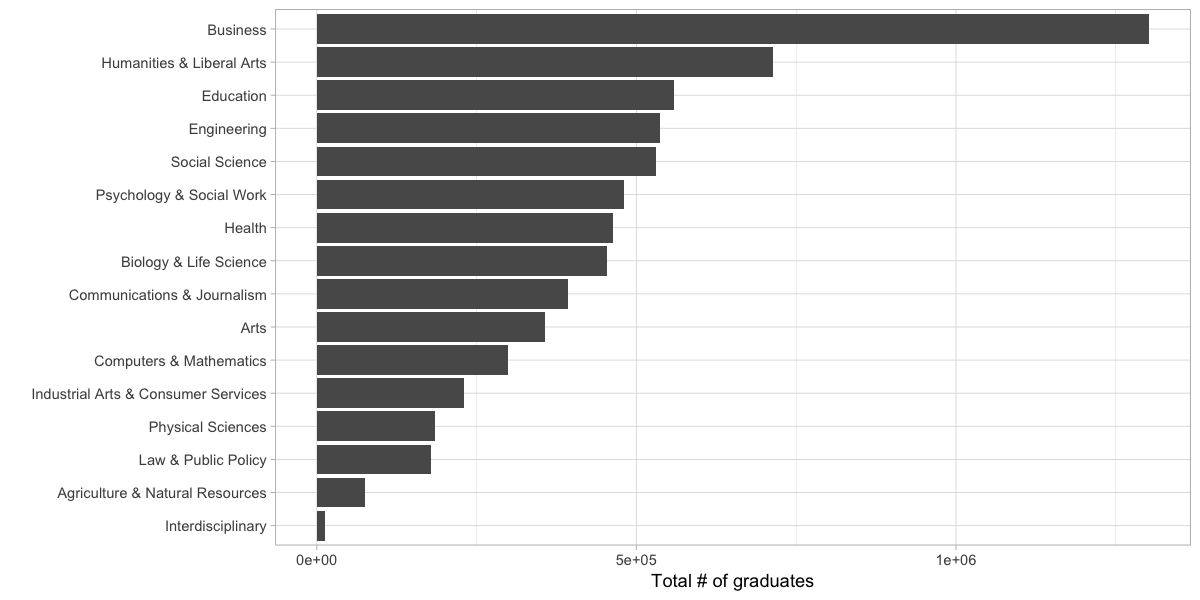

In [101]:
major_processed %>%
    count(Major_category, wt = Total, sort = TRUE) %>%
    mutate(Major_category = fct_reorder(Major_category, n)) %>%
    ggplot(aes(Major_category, n)) +
    geom_col() +
    coord_flip() +
    labs(x = "",
        y = "Total # of graduates") +
    # rainbow color not appearing tho :(
    theme(legend.position = "none")

### Most common major

What were the most common **majors**? (since there were 173 we're only showing some)

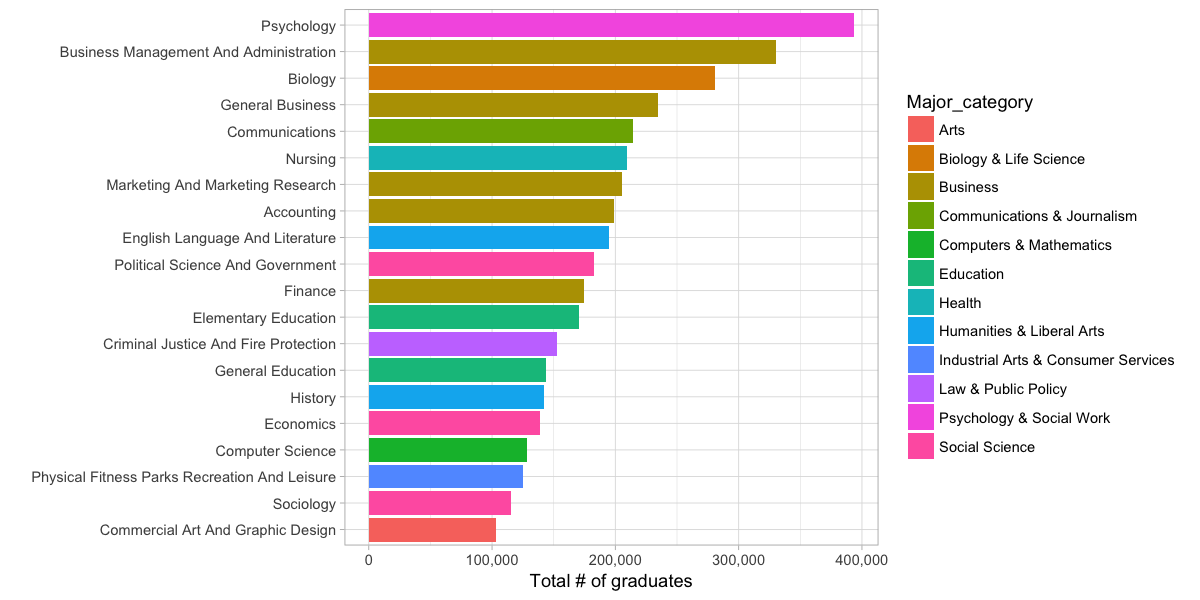

In [102]:
major_processed %>%
    mutate(Major = fct_reorder(Major, Total)) %>%
    arrange(desc(Total)) %>%
    head(20) %>%
    ggplot(aes(Major, Total, fill = Major_category)) +
    geom_col() +
    coord_flip() +
    scale_y_continuous(labels = comma_format()) +
    labs(x = "",
        y = "Total # of graduates")

### How does gender breakdown relate to typical earnings?

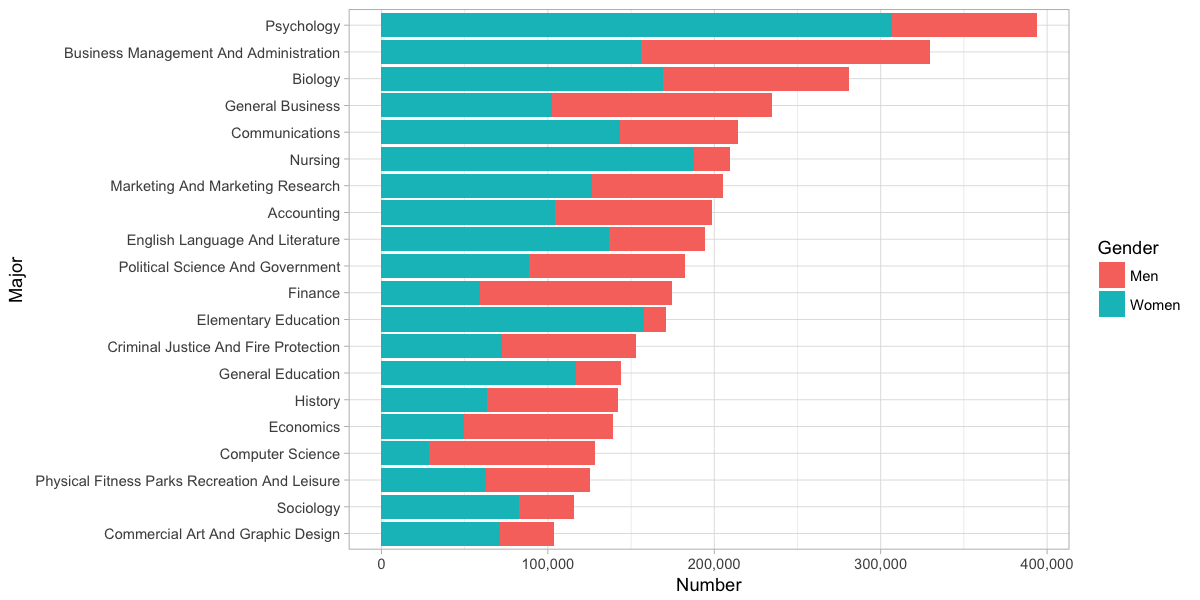

In [103]:
major_processed %>%
    arrange(desc(Total)) %>%
    head(20) %>%
    mutate(Major = fct_reorder(Major, Total)) %>%
    # `gather` will collapse the two columns (Women, Men) into a single Gender column where value is n 
    # extra observations are added to df as a consequence
    gather(Gender, Number, Women, Men) %>%
    ggplot(aes(Major, Number, fill = Gender)) +
    scale_y_continuous(labels = comma_format()) +
    geom_col() +
    coord_flip()

In [114]:
# Common pattern: group_by -> summarize -> arrange 
by_major_category <- major_processed %>%
    filter(!is.na(Total)) %>% 
    group_by(Major_category) %>%
    # summarize is nice when you need to apply different functions to columns
    summarize(Men = sum(Men), 
              Women = sum(Women), 
              Total = sum(Total), 
              # weight the medians by sample size
              MedianSalary = sum(Median * Sample_size) / sum(Sample_size))%>%
    mutate(ShareWomen = Women / Total) %>%
    arrange(desc(ShareWomen))

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

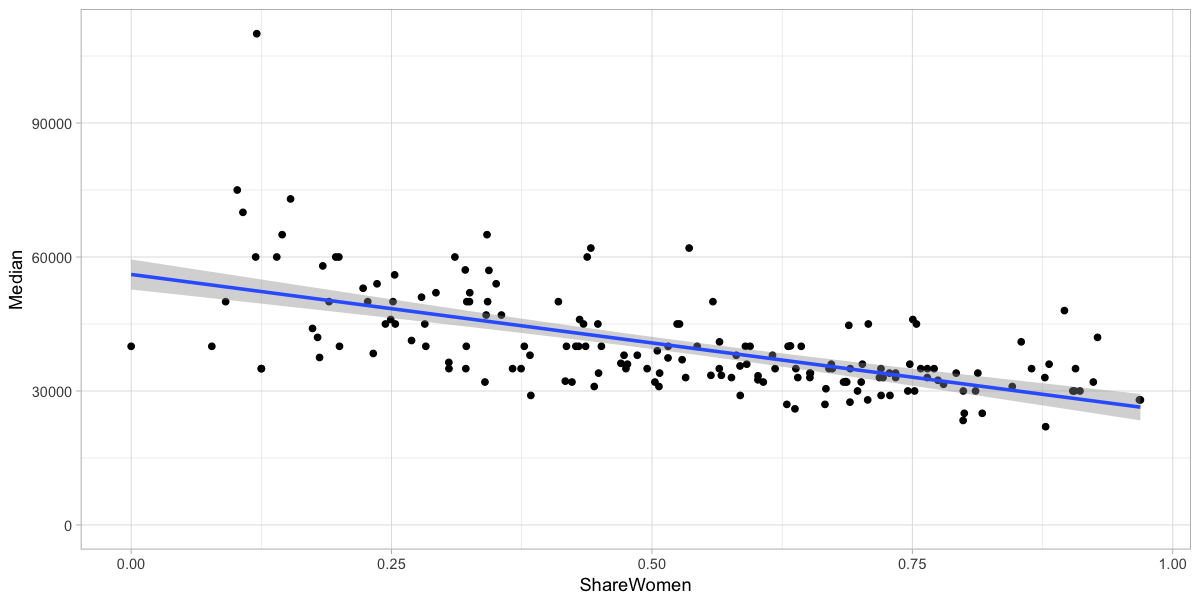

In [116]:
library(ggrepel)
major_processed %>%
    ggplot(aes(ShareWomen, Median)) +
    geom_point() +
    geom_smooth(method = "lm") +
#     geom_text() +
    expand_limits(y = 0)

In [124]:
# every percentage pt a field is male, the expected salary would decrease by 23650 / 100 => ~$237
major_processed %>%
    select(Major, Total, ShareWomen, Sample_size, Median) %>%
    # linear model; Median explained by ShareWomen
    # weighted linear regression with extra weight param
    # it tells lm that for e.g. Petroleum Engr. > Metallurgical Engr. in Sample_size
    lm(Median ~ ShareWomen, data = ., weight = Sample_size) %>%
    summary()


Call:
lm(formula = Median ~ ShareWomen, data = ., weights = Sample_size)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-260500  -61042  -13899   33262  865081 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    52073       1436  36.255   <2e-16 ***
ShareWomen    -23650       2403  -9.842   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 123000 on 170 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.363,	Adjusted R-squared:  0.3592 
F-statistic: 96.87 on 1 and 170 DF,  p-value: < 2.2e-16


In [ ]:
# 54:03